In [1]:
import logging
logging.basicConfig(format='%(asctime)s - %(message)s',
                    datefmt='%d-%b-%y %H:%M:%S',
                    level=logging.INFO
                   )

logging.info('Importing standard python libraries')
from pathlib import Path

logging.info('Importing third party python libraries')
import numpy as np
import xarray as xr
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.path as mpath
from matplotlib import gridspec
from matplotlib.ticker import ScalarFormatter
import matplotlib.font_manager as fm
import cartopy.feature as cfeature
import cartopy.crs as ccrs
import cmocean.cm as cmo
import cycler
import f90nml


logging.info("Importing custom python libraries")
import pvcalc

logging.info('Setting paths')
base_path = Path('/work/n01/n01/fwg/irminger-proj')
raw_path = base_path / 'data/raw'
interim_path = base_path / 'data/interim'
processed_path = base_path / 'data/processed'
figure_path = base_path / 'figures/200m'

logging.info("Setting plotting defaults")
fpath = Path('/home/n01/n01/fwg/.local/share/fonts/PTSans-Regular.ttf')
assert fpath.exists()
font_prop = fm.FontProperties(fname=fpath)
plt.rcParams['font.family'] = font_prop.get_family()
plt.rcParams['font.sans-serif'] = [font_prop.get_name()]

# font size
plt.rc('xtick', labelsize='8')
plt.rc('ytick', labelsize='8')
plt.rc('text', usetex=False)
plt.rcParams['axes.titlesize'] = 10
plt.rcParams["text.latex.preamble"] = "\\usepackage{euler} \\usepackage{paratype}"

# output
dpi = 600
text_width = 6

n = 6
color = cmo.dense(np.linspace(0, 1,n))
plt.rcParams['axes.prop_cycle'] = cycler.cycler('color', color)

15-Dec-22 15:48:45 - Importing standard python libraries
15-Dec-22 15:48:45 - Importing third party python libraries
15-Dec-22 15:49:32 - Importing custom python libraries
15-Dec-22 15:49:33 - Setting paths
15-Dec-22 15:49:33 - Setting plotting defaults


In [2]:
logging.info("Opening 200 m test")

run_path = raw_path / "3d-models-200m/standard"

data_nml = f90nml.read(run_path / "data")
delta_t = data_nml['parm03']['deltat']
f0 = data_nml['parm01']['f0']
beta = data_nml['parm01']['beta']
no_slip_bottom = data_nml['parm01']['no_slip_bottom']
no_slip_sides = data_nml['parm01']['no_slip_sides']

from xmitgcm import open_mdsdataset
ds_std = open_mdsdataset(run_path,
                        prefix=['ZLevelVars', 'IntLevelVars'],
                        delta_t=delta_t,
                        geometry='cartesian',
                        #iters=21600
                        #chunks=300
                        )

ds_std.attrs['f0'] = f0
ds_std.attrs['beta'] = beta
ds_std.attrs['no_slip_bottom'] = no_slip_bottom
ds_std.attrs['no_slip_sides'] = no_slip_sides

15-Dec-22 15:49:33 - Opening 200 m test


In [3]:
ds_std

<xarray.Dataset>
Dimensions:   (XC: 750, YC: 250, XG: 750, YG: 250, Z: 500, Zp1: 501, Zu: 500,
               Zl: 500, time: 49)
Coordinates: (12/34)
  * XC        (XC) >f4 100.0 300.0 500.0 700.0 ... 1.495e+05 1.497e+05 1.499e+05
  * YC        (YC) >f4 100.0 300.0 500.0 700.0 ... 4.95e+04 4.97e+04 4.99e+04
  * XG        (XG) >f4 0.0 200.0 400.0 600.0 ... 1.494e+05 1.496e+05 1.498e+05
  * YG        (YG) >f4 0.0 200.0 400.0 600.0 ... 4.94e+04 4.96e+04 4.98e+04
  * Z         (Z) >f4 -0.5 -1.5 -2.5 -3.5 -4.5 ... -496.5 -497.5 -498.5 -499.5
  * Zp1       (Zp1) >f4 0.0 -1.0 -2.0 -3.0 -4.0 ... -497.0 -498.0 -499.0 -500.0
    ...        ...
    dyF       (YC, XC) >f4 dask.array<chunksize=(250, 750), meta=np.ndarray>
    dxF       (YC, XC) >f4 dask.array<chunksize=(250, 750), meta=np.ndarray>
    dxV       (YG, XG) >f4 dask.array<chunksize=(250, 750), meta=np.ndarray>
    rhoRef    (Z) >f4 dask.array<chunksize=(500,), meta=np.ndarray>
    iter      (time) int64 dask.array<chunksize=(1,), meta=np.ndarray>
  * time      (time) timedelta64[ns] 0 days 00:00:00 ... 6 days 00:00:00
Data variables:
    WVEL      (time, Zl, YC, XC) float32 dask.array<chunksize=(1, 500, 250, 750), meta=np.ndarray>
    UVEL      (time, Z, YC, XG) float32 dask.array<chunksize=(1, 500, 250, 750), meta=np.ndarray>
    VVEL      (time, Z, YG, XC) float32 dask.array<chunksize=(1, 500, 250, 750), meta=np.ndarray>
    RHOAnoma  (time, Z, YC, XC) float32 dask.array<chunksize=(1, 500, 250, 750), meta=np.ndarray>
    TOTTTEND  (time, Z, YC, XC) float32 dask.array<chunksize=(1, 500, 250, 750), meta=np.ndarray>
Attributes:
    Conventions:     CF-1.6
    title:           netCDF wrapper of MITgcm MDS binary data
    source:          MITgcm
    history:         Created by calling `open_mdsdataset(grid_dir=None, iters...
    f0:              0.000126
    beta:            0.0
    no_slip_bottom:  False
    no_slip_sides:   False

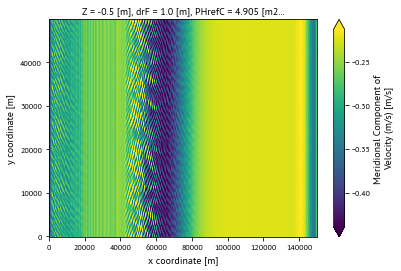

In [6]:
ds_std["VVEL"].isel(time=-1, Z=0).plot(robust=True)

(array([1.502280e+05, 5.452200e+04, 1.680000e+05, 2.923800e+04,
        1.580120e+05, 1.862500e+05, 1.867500e+05, 8.192323e+06,
        2.476770e+05, 2.000000e+03]),
 array([-0.05292869, -0.04609093, -0.03925317, -0.0324154 , -0.02557764,
        -0.01873988, -0.01190212, -0.00506436,  0.0017734 ,  0.00861116,
         0.01544892], dtype=float32),
 <BarContainer object of 10 artists>)

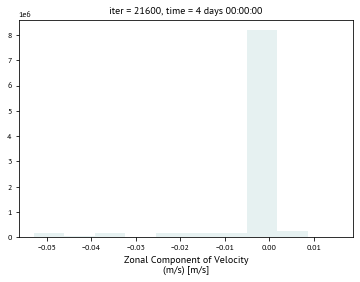

In [12]:
ds_std["UVEL"].isel(time=-1, Z=slice(0, 50)).plot()


In [18]:
1.804e6 / 60 / 60 / 24

20.87962962962963

In [4]:
def prep_for_wmt(ds, grid, rhonil, talpha):
    ds['rhoTEND'] = - rhonil * talpha * ds['TOTTTEND']
    ds['bTEND'] = pvcalc.calculate_buoyancy(ds['rhoTEND'])
    ds['hTEND'] = ds['bTEND'] / grid.interp(ds['db_dz'], 'Z', boundary='fill')
    return ds

def prep_for_pv(ds):
    grid = pvcalc.create_xgcm_grid(ds)
    ds['drL'] = pvcalc.create_drL_from_dataset(ds)
    ds['rho'] = pvcalc.calculate_density(ds['RHOAnoma'], ds['rhoRef'])
    ds['b'] = pvcalc.calculate_buoyancy(ds['rho'])

    grad_b = pvcalc.calculate_grad_buoyancy(ds['b'], ds, grid)
    ds['db_dx'], ds['db_dy'], ds['db_dz'] = grad_b
    
    db_dz_mask = xr.where(grid.interp(ds['maskC'],
                                      ['Z'],
                                      to={'Z': 'right'},
                                      boundary='fill') == 0,
                          np.nan,
                          1)

    ds['db_dz'] = ds['db_dz'] * db_dz_mask

    curl_vel = pvcalc.calculate_curl_velocity(ds['UVEL'],
                                              ds['VVEL'],
                                              ds['WVEL'],
                                              ds,
                                              grid,no_slip_bottom,
                                              no_slip_sides)

    ds['zeta_x'], ds['zeta_y'], ds['zeta_z'] = curl_vel
    
    ds['NaNmaskC'] = xr.where(ds['maskC'] == 1, 1, np.NaN)
    
    ds['maskQ'] = grid.interp(ds['maskW'],
                              ['Y', 'Z'],
                              to={'Z': 'right', 'Y': 'left'},
                              boundary='fill')
    
    ds['NaNmaskQ'] = xr.where(ds['maskQ'] == 0, np.nan, 1)
    
    ds['Q'] = pvcalc.calculate_C_potential_vorticity(ds['zeta_x'],
                                                    ds['zeta_y'],
                                                    ds['zeta_z'],
                                                    ds['b'],
                                                    ds,
                                                    grid,
                                                    beta,
                                                    f0
                                                    ) * ds['NaNmaskQ']

    
    
    
    return ds, grid


ds_std, grid = prep_for_pv(ds_std)

rhonil, talpha = data_nml['parm01']['rhonil'], data_nml['parm01']['talpha']
ds_std = prep_for_wmt(ds_std, grid, rhonil, talpha)


# Only change cells below this point
The above is from the intro to standard_model_plotting.py

28-Nov-22 11:39:09 - No LaTeX-compatible font found for the sans-serif fontfamily in rcParams. Using default.
28-Nov-22 11:39:09 - No LaTeX-compatible font found for the sans-serif fontfamily in rcParams. Using default.
28-Nov-22 11:39:09 - No LaTeX-compatible font found for the sans-serif fontfamily in rcParams. Using default.
28-Nov-22 11:39:09 - No LaTeX-compatible font found for the sans-serif fontfamily in rcParams. Using default.
28-Nov-22 11:39:10 - No LaTeX-compatible font found for the sans-serif fontfamily in rcParams. Using default.
28-Nov-22 11:39:10 - No LaTeX-compatible font found for the sans-serif fontfamily in rcParams. Using default.
28-Nov-22 11:39:10 - No LaTeX-compatible font found for the sans-serif fontfamily in rcParams. Using default.
28-Nov-22 11:39:10 - No LaTeX-compatible font found for the sans-serif fontfamily in rcParams. Using default.
28-Nov-22 11:39:10 - No LaTeX-compatible font found for the sans-serif fontfamily in rcParams. Using default.
28-Nov-22 

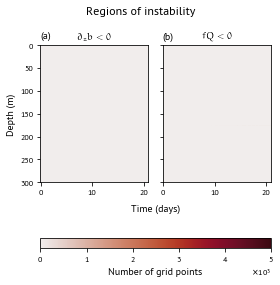

In [5]:
ds_std["time"] = ds_std["time"].astype("float32") * 1e-9

unstable_strat = xr.where(ds_std["db_dz"] < 0, 1, 0).sum("XC").transpose('Zl', 'time', ...)

unstable_strat = unstable_strat.compute()

unstable_pv = xr.where(ds_std["Q"] < 0, 1, 0).sum("XG").transpose("Zl", "time", ...)

unstable_pv = unstable_pv.compute()

fig = plt.figure(figsize=(4, 4))


gs = gridspec.GridSpec(2, 2,
                      width_ratios=[1, 1],
                      height_ratios=[14, 1]
                      )

ax_xlab = fig.add_subplot(gs[0, :])
axs = [fig.add_subplot(gs[0, 0]),
       fig.add_subplot(gs[0, 1]),
       fig.add_subplot(gs[1, :])]



cax = axs[0].pcolormesh(unstable_strat["time"] / 24 / 60 / 60,
                  -unstable_strat["Zl"],
                  unstable_strat.squeeze(),
                  vmin=0,
                  vmax=5000,
                  cmap=cmo.amp,
                  rasterized=True)

axs[1].pcolormesh(unstable_pv["time"] / 24 / 60 / 60,
                  -unstable_pv["Zl"],
                  unstable_pv.squeeze(),
                  vmin=0,
                  vmax=5000,
                  cmap=cmo.amp,
                  rasterized=True)

axs[1].set_yticklabels([])
axs[0].invert_yaxis()
axs[1].invert_yaxis()

ylim = 300
axs[0].set_ylim(ylim, 0)
axs[1].set_ylim(ylim, 0)

ax_xlab.set_xlabel("Time (days)", labelpad=18)
ax_xlab.set_yticks([])
ax_xlab.set_xticks([])

ax_xlab.spines['top'].set_visible(False)
ax_xlab.spines['right'].set_visible(False)
ax_xlab.spines['bottom'].set_visible(False)
ax_xlab.spines['left'].set_visible(False)

axs[0].set_title("$\\partial_z b < 0$", usetex=True)
axs[1].set_title("$fQ < 0$", usetex=True)

axs[0].set_title("(a)", loc="left")
axs[1].set_title("(b)", loc="left")


fig.suptitle("Regions of instability")

axs[0].set_ylabel("Depth (m)")

fmt = ScalarFormatter(useMathText=True)
fmt.set_powerlimits((0, 0))
cb = fig.colorbar(cax, cax=axs[2],
                  orientation="horizontal",
                  label="Number of grid points",
                  format=fmt)

fig.tight_layout()

fig.savefig(figure_path / "StandardInstabilityRegion.pdf", dpi=dpi)

In [6]:
pvcalc.calculate_potential_vorticity??

Signature:
pvcalc.calculate_potential_vorticity(
    zeta_x,
    zeta_y,
    zeta_z,
    dbdx,
    dbdy,
    dbdz,
    ds_grid,
    grid,
    beta,
    f0,
)
Docstring: <no docstring>
Source:   
def calculate_potential_vorticity(zeta_x, zeta_y, zeta_z, dbdx, dbdy, dbdz, ds_grid, grid, beta, f0):
    zeta_x_interp = grid.interp(zeta_x, axis=['Y', 'Z'], boundary=boundz)
    zeta_y_interp = grid.interp(zeta_y, axis=['X', 'Z'], boundary=boundz)
    zeta_z_interp = grid.interp(zeta_z.chunk({'Z': -1}), axis=['X', 'Y'], boundary=boundz)
    
    f = f0 + beta * ds_grid['YC']

    dbdx_interp = grid.interp(dbdx, axis=['X'], boundary=boundz)
    dbdy_interp = grid.interp(dbdy, axis=['Y'], boundary=boundz)
    dbdz_interp = grid.interp(dbdz, axis=['Z'], boundary=boundz)
    
    # I have this here only for debugging
    # Q is a scalar and does NOT have components
    Q_x = dbdx_interp * zeta_x_interp
    Q_y = dbdy_interp * zeta_y_interp
    Q_z = dbdz_interp * (zeta_z_interp + f)
    Q = Q_x +

In [4]:
ds_std["Q2"] = pvcalc.calculate_potential_vorticity(ds_std['zeta_x'],
                                     ds_std['zeta_y'],
                                     ds_std['zeta_z'],
                                     ds_std['db_dx'],
                                     ds_std['db_dy'],
                                     ds_std['db_dz'],
                                     ds_std,
                                     grid,
                                     beta,
                                     f0)


In [8]:
ds_std["Q2"].isel(time=150).plot(vmin=-2e-10, vmax=2e-10, cmap=cmo.curl)
plt.xlim(0, 100e3)
plt.ylim(-250, 0)

KeyError: 'Q2'

In [26]:
ds_std["Qver"] = (f0 + ds_std["zeta_z"].squeeze()) * grid.interp(ds_std["db_dz"].squeeze(), ["Z", "X"], boundary="extend")

In [7]:
ds_std["Qhor"] = ds_std["zeta_x"].squeeze() * grid.interp(ds_std["db_dx"].squeeze(), ["Z", "X"], to={"Z": "right", "X": "center"}, boundary="extend")

In [47]:
ds_std["Qver"].isel(time=70).plot(vmin=-2e-9, vmax=2e-9, cmap=cmo.curl)

In [8]:
tid = 120

(-250.0, 0.0)

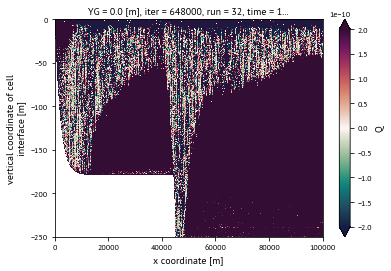

In [9]:
ds_std["Q"].isel(time=tid).plot(vmin=-2e-10, vmax=2e-10, cmap=cmo.curl)
plt.xlim(0, 100e3)
plt.ylim(-250, 0)

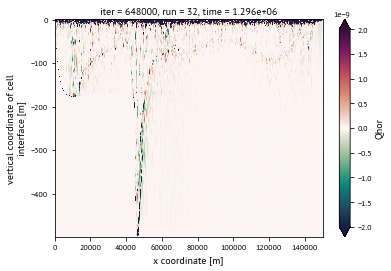

In [33]:
ds_std["Qhor"].isel(time=tid).plot(vmin=-2e-9, vmax=2e-9, cmap=cmo.curl)

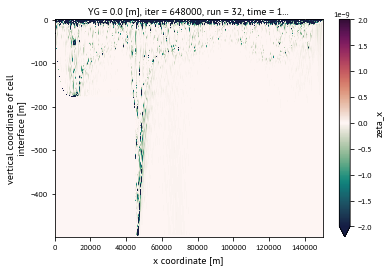

In [32]:
(-ds_std["zeta_x"] * ds_std["zeta_x"] * f0).isel(time=tid).plot(vmin=-2e-9, vmax=2e-9, cmap=cmo.curl)

(-250.0, 0.0)

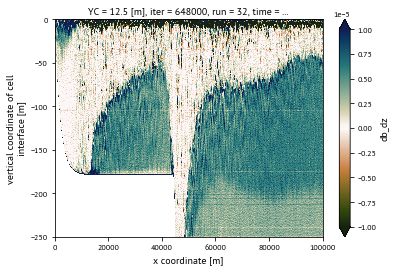

In [11]:
ds_std["db_dz"].isel(time=tid).plot(vmin=-1e-5, vmax=1e-5, cmap=cmo.tarn)
plt.xlim(0, 100e3)
plt.ylim(-250, 0)#vmin=-2e-9, vmax=2e-9, cmap=cmo.curl)

(0.0, 100000.0)

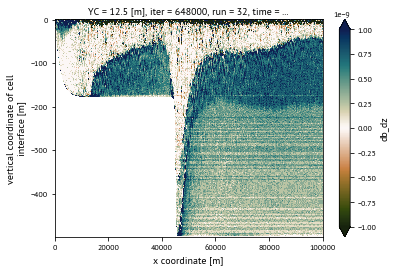

In [14]:
(f0 * ds_std["db_dz"]).isel(time=tid).plot(vmin=-1e-9, vmax=1e-9, cmap=cmo.tarn)
plt.xlim(0, 100e3)

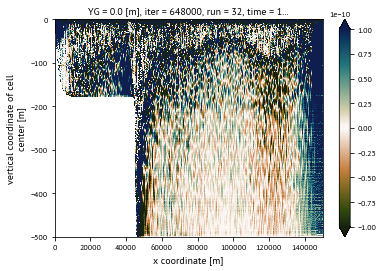

In [29]:
(ds_std["zeta_z"].squeeze() * grid.interp(ds_std["db_dz"].squeeze(), ["Z", "X"], boundary="extend")).isel(time=tid).plot(vmin=-1e-10, vmax=1e-10, cmap=cmo.tarn)

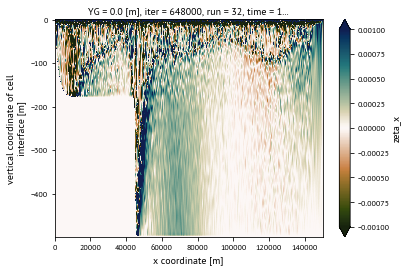

In [23]:
ds_std["zeta_x"].squeeze().isel(time=tid).plot(vmin=-1e-3, vmax=1e-3, cmap=cmo.tarn)

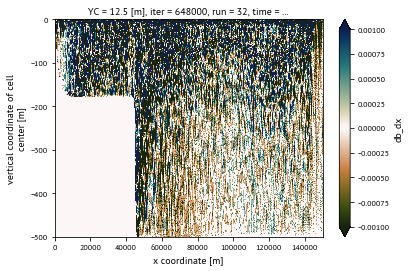

In [26]:
(ds_std["db_dx"] / f0).squeeze().isel(time=tid).plot(vmin=-1e-3, vmax=1e-3, cmap=cmo.tarn)

In [6]:
db_dz_interp = grid.interp(ds_std["db_dz"], "X", boundary="extend")

In [11]:
unstable_strat = xr.where(db_dz_interp < 0, 1, 0).squeeze()#.sum("XC").transpose('Zl', 'time', ...)
stable_strat = xr.where(unstable_strat, 0, 1)


unstable_pv = xr.where(ds_std["Q"] < 0, 1, 0).squeeze()#.sum("XG").transpose("Zl", "time", ...)
stable_pv = xr.where(unstable_pv, 0, 1)


In [14]:
both = unstable_strat * unstable_pv
both.sum("XG").transpose("Zl", "time", ...).plot()
#grav_only = unstable_strat and not unstable_pv

## Looking at saturation causes

In [23]:
ds_extreme = ds.isel(run=11)
ds_extreme, grid = prep_for_pv(ds_extreme)

rhonil, talpha = data_nml['parm01']['rhonil'], data_nml['parm01']['talpha']
ds_extreme = prep_for_wmt(ds_extreme, grid, rhonil, talpha)
ds_extreme

<xarray.Dataset>
Dimensions:        (YC: 1, XC: 6000, Z: 500, Zp1: 501, time: 168, XG: 6000,
                    YG: 1, Zl: 500, Zu: 500)
Coordinates: (12/35)
    Depth          (YC, XC) float32 dask.array<chunksize=(1, 6000), meta=np.ndarray>
    PHrefC         (Z) float32 dask.array<chunksize=(500,), meta=np.ndarray>
    PHrefF         (Zp1) float32 dask.array<chunksize=(501,), meta=np.ndarray>
  * XC             (XC) float32 12.5 37.5 62.5 ... 1.499e+05 1.5e+05 1.5e+05
  * XG             (XG) float32 0.0 25.0 50.0 75.0 ... 1.499e+05 1.5e+05 1.5e+05
  * YC             (YC) float32 12.5
    ...             ...
    rAs            (YG, XC) float32 dask.array<chunksize=(1, 6000), meta=np.ndarray>
    rAw            (YC, XG) float32 dask.array<chunksize=(1, 6000), meta=np.ndarray>
    rAz            (YG, XG) float32 dask.array<chunksize=(1, 6000), meta=np.ndarray>
    rhoRef         (Z) float32 dask.array<chunksize=(500,), meta=np.ndarray>
    run            int64 18
  * time           (time) timedelta64[ns] 0 days 00:00:00 ... 20 days 21:00:00
Data variables: (12/23)
    RHOAnoma       (time, Z, YC, XC) float32 dask.array<chunksize=(1, 500, 1, 6000), meta=np.ndarray>
    TOTTTEND       (time, Z, YC, XC) float32 dask.array<chunksize=(1, 500, 1, 6000), meta=np.ndarray>
    UVEL           (time, Z, YC, XG) float32 dask.array<chunksize=(1, 500, 1, 6000), meta=np.ndarray>
    VVEL           (time, Z, YG, XC) float32 dask.array<chunksize=(1, 500, 1, 6000), meta=np.ndarray>
    WVEL           (time, Zl, YC, XC) float32 dask.array<chunksize=(1, 500, 1, 6000), meta=np.ndarray>
    wind_duration  float64 dask.array<chunksize=(), meta=np.ndarray>
    ...             ...
    maskQ          (Zl, YG, XG) float64 dask.array<chunksize=(124, 1, 3000), meta=np.ndarray>
    NaNmaskQ       (Zl, YG, XG) float64 dask.array<chunksize=(124, 1, 3000), meta=np.ndarray>
    Q              (time, Zl, YG, XG) float64 dask.array<chunksize=(1, 124, 1, 1), meta=np.ndarray>
    rhoTEND        (time, Z, YC, XC) float32 dask.array<chunksize=(1, 500, 1, 6000), meta=np.ndarray>
    bTEND          (time, Z, YC, XC) float32 dask.array<chunksize=(1, 500, 1, 6000), meta=np.ndarray>
    hTEND          (time, Z, YC, XC) float64 dask.array<chunksize=(1, 1, 1, 3000), meta=np.ndarray>
Attributes:
    Conventions:     CF-1.6
    beta:            0.0
    f0:              0.000126
    history:         Created by calling `open_mdsdataset(grid_dir=None, iters...
    no_slip_bottom:  False
    no_slip_sides:   False
    source:          MITgcm
    title:           netCDF wrapper of MITgcm MDS binary data

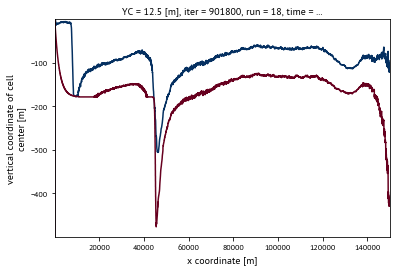

In [24]:
ds_extreme["delta_rho"] = ds_extreme["rho"] - ds_extreme["rho"].sel(Z=0, method="nearest")
ds_extreme["delta_rho"].isel(time=-1).squeeze().plot.contour(levels=[0.01, 0.05])

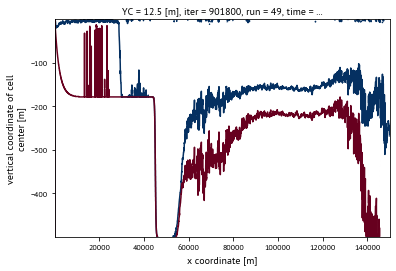

In [20]:
ds_extreme["delta_rho"] = ds_extreme["rho"] - ds_extreme["rho"].sel(Z=0, method="nearest")
ds_extreme["delta_rho"].isel(time=-1).squeeze().plot.contour(levels=[0.01, 0.05])